# Use scVI and PeakVI to visualize *single-modal* latent space

In [1]:
# Hide warnings generated in notebook.
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import libraries.
import scanpy as sc
import scvi

OMP: Warning #234: OMP_NUM_THREADS: Invalid symbols found. Check the value "".
[rank: 0] Global seed set to 0


## Visualize latent space of single-modal *gene expression* data

Prior to integrating single-cell RNA and single-cell ATAC data using MultiVI trained on a multi-modal data set, visualize the latent representation of the single-modal gene expression data using **scVI**. 

**scVI** is the gene expression encoder used in MultiVI and can be trained on single-cell RNA data for 1) dimensionality reduction, 2) removal of unwanted variation, 3) integration across replicates, donors, and technologies, 4) differential expression, 5) imputation, and 6) normalization of other cell- and sample-level confounding factors.

### *Read data and visualize data structure*

In [3]:
# Load single-cell RNA data.
cd_rna = scvi.data.read_h5ad("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/data/cd34_rna.h5ad")

# Look at the data set attributes.
cd_rna

AnnData object with n_obs × n_vars = 6881 × 12464
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'DoubletScores', 'n_counts', 'leiden', 'phenograph', 'log_n_counts', 'celltype', 'Metacell', 'palantir_pseudotime', 'palantir_diff_potential'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DMEigenValues', 'celltype_colors', 'ct_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'palantir_branch_probs_columns', 'pca', 'phenograph_colors', 'sample_colors', 'umap'
    obsm: 'DM_EigenVectors', 'X_FDL', 'X_pca', 'X_umap', 'palantir_branch_probs'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'connectivities', 'distances'

In [4]:
# Look at the head of the data.
cd_rna.var.head()

,n_cells,highly_variable,means,dispersions,dispersions_norm
LINC01128,514,False,0.220300,2.931772,-0.212848
FAM41C,131,False,0.056383,3.047249,-0.456406
NOC2L,1703,False,0.748765,2.519527,-1.207213
ISG15,1071,False,0.462118,2.761339,-0.311936
AGRN,115,False,0.045109,2.861819,-1.635009


### *Set up the AnnData object using raw counts*


In [5]:
# Store raw counts in counts layer.
cd_rna.layers['counts'] = cd_rna.raw.X.copy()

In [6]:
# Set up AnnData object for training using the counts layer.
# OPTIONAL: Identify categorical and continuous covariates.
scvi.model.SCVI.setup_anndata(cd_rna, layer='counts')

### *Create and train scVI model*

In [7]:
# Create scVI model.
# rna_model = scvi.model.SCVI(cd_rna)

In [8]:
# Train the scVI model.
# rna_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 400/400: 100%|██████████| 400/400 [04:01<00:00,  1.59it/s, loss=7.42e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:01<00:00,  1.65it/s, loss=7.42e+03, v_num=1]


In [9]:
# Save the trained scVI model.
# rna_model.save("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_scVI", overwrite=True)

In [7]:
# Load the trained scVI model.
rna_model = scvi.model.SCVI.load("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_scVI", adata=cd_rna)

INFO     File                                                                                                      
         /fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_scVI/model.pt  
         already downloaded                                                                                        


### *Visualize the latent space of the scVI model*

In [8]:
# Store the latent representation from the model in the AnnData object.
latent = rna_model.get_latent_representation()
cd_rna.obsm["X_scVI"] = latent

In [9]:
# Look at the shape of the latent space.
print(latent.shape)

(6881, 10)


In [10]:
# Use the scVI latent space to generate a UMAP.
sc.pp.neighbors(cd_rna, use_rep="X_scVI")
sc.tl.umap(cd_rna, min_dist=0.3)

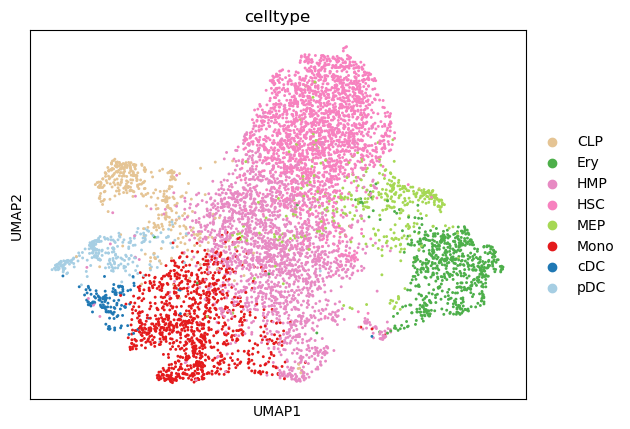

In [11]:
# Visualize UMAP of latent space.
sc.pl.umap(cd_rna, color=['celltype'])

## Visualize latent space of single-modal *chromatin accessibility* data

Prior to integrating single-cell RNA and single-cell ATAC data using MultiVI trained on a multi-modal data set, visualize the latent representation of the single-modal chromatin accessibility data using **PeakVI**. 

**PeakVI** is the chromatin accessibility encoder used in MultiVI and can be trained on single-cell ATAC data for 1) dimensionality reduction, 2) removal of unwanted variation, 3) integration across replicates, donors, and technologies, 4) differential expression, 5) imputation, and 6) normalization of other cell- and sample-level confounding factors.

### *Read data and visualize data structure*

In [12]:
# Load single-cell ATAC data.
cd_atac = scvi.data.read_h5ad("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/data/cd34_atac.h5ad")

# Look at the data set attributes.
cd_atac

AnnData object with n_obs × n_vars = 6881 × 246113
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden', 'phenograph', 'celltype', 'rnaPhenograph', 'rnaLeiden', 'Metacell'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'nearestGene', 'distToGeneStart', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx'
    uns: 'DM_EigenValues', 'GeneScoresColums', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'phenograph_colors', 'rnaLeiden_colors', 'rnaPhenograph_colors', 'umap'
    obsm: 'DM_EigenVectors', 'GeneScores', 'X_FDL', 'X_svd', 'X_umap'
    obsp: 'DM_kernel', 'connectivities', 'distances'

In [13]:
# Look at the head of the data.
cd_atac.var.head()

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,nearestGene,distToGeneStart,peakType,distToTSS,nearestTSS,GC,idx
chr1:816070-816570,chr1,816070,816570,501,*,22.29089,0.630,0.443,2,C13._.cd34_multiome_rep2,FAM87B,1051,Promoter,1050,uc057aum.1,0.2894,1
chr1:817092-817592,chr1,817092,817592,501,*,81.21551,0.909,0.863,2,C13._.cd34_multiome_rep1,FAM87B,29,Promoter,28,uc057aum.1,0.4790,2
chr1:827266-827766,chr1,827266,827766,501,*,21.71270,0.974,0.903,2,C12._.cd34_multiome_rep1,LINC01128,2378,Promoter,5,uc057auo.1,0.6926,3
chr1:838271-838771,chr1,838271,838771,501,*,51.67031,0.858,0.776,2,C1._.cd34_multiome_rep2,LINC01128,13383,Intronic,6915,uc057auo.1,0.4611,4
chr1:842638-843138,chr1,842638,843138,501,*,13.77630,0.628,0.418,2,C1._.cd34_multiome_rep2,LINC01128,17750,Intronic,8459,uc057auo.1,0.5689,5


### *Set up the AnnData object*

In [14]:
# Set up AnnData object for training.
# OPTIONAL: Identify categorical and continuous covariates.
scvi.model.PEAKVI.setup_anndata(cd_atac)

### *Create and train PeakVI model*

In [18]:
# Create PeakVI model.
# atac_model = scvi.model.PEAKVI(cd_atac)

In [19]:
# Train the PeakVI model.
# atac_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 97/500:  19%|█▉        | 97/500 [17:34<1:13:02, 10.87s/it, loss=3.69e+08, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 25781.197. Signaling Trainer to stop.


In [20]:
# Save the trained PeakVI model.
# atac_model.save("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_PeakVI", overwrite=True)

In [15]:
# Load the trained PeakVI model.
atac_model = scvi.model.PEAKVI.load("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_PeakVI", adata=cd_atac)

INFO     File                                                                                                      
         /fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/cd34_latent_space_PeakVI/model.pt
         already downloaded                                                                                        


### *Visualize the latent space of the PeakVI model*


In [16]:
# Store the latent representation from the model in the AnnData object.
latent = atac_model.get_latent_representation()
cd_atac.obsm["X_PeakVI"] = latent

In [17]:
# Look at the shape of the latent space.
print(latent.shape)

(6881, 22)


In [18]:
# Use the PeakVI latent space to generate a UMAP.
sc.pp.neighbors(cd_atac, use_rep="X_PeakVI")
sc.tl.umap(cd_atac, min_dist=0.3)

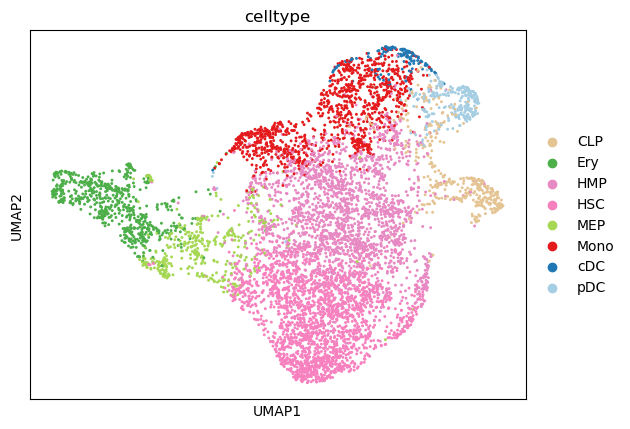

In [19]:
# Visualize UMAP of latent space.
sc.pl.umap(cd_atac, color=['celltype'])